<a href="https://colab.research.google.com/github/Shahfaisal8678/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name-Netflix Movies and TV Shows Clustering**

Name - Shah Faisal

Contribution - Individual

# **Problem Description-**

In this project, the goal is to analyze and cluster a dataset of Netflix movies and TV shows. The dataset contains various attributes such as title, description, release year, duration, genres, and more. The objective is to group similar content items together into clusters based on their attributes. This clustering can provide insights into the underlying patterns and relationships between different types of content available on the platform.



# **Data Description**

The dataset comprises a collection of Netflix movies and TV shows, each represented by various attributes.

**Attributes:-**

Show_ID: A unique identifier for each content entry.

Type: Denotes whether the entry is a movie or TV show.

Title: The title of the content.

Director: The director's name (if applicable).

Cast: List of actors or characters (if applicable).

Country: The country of origin.

Date_Added: The date the content was added to Netflix.

Release_Year: The year the content was released.

Rating: The content's rating.

Duration: The duration in terms of seasons or minutes.

Listed_In: The genre(s) the content is categorized under.

Description: A brief synopsis of the content's plot.

# **Objective**

The objective of this dataset is to explore and analyze the content attributes to uncover patterns, trends, and potential clusters within the Netflix movies and TV shows. By utilizing clustering techniques, we aim to group similar content items together based on shared attributes. This analysis can provide valuable insights for content recommendation, trend analysis, and understanding user preferences on the platform.

# **Project Summary -**

In [ ]:
#Importing libraries that are required
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# connecting to drive for data set
from google.colab import drive

In [ ]:
# importing libraries from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# storing the seol bike dataset from google drive
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
# Let's check first five rows of the data sets
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Let's check last five rows of the datasets
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
# Let's see shape of the dataset
df.shape

(7787, 12)

We found there are 7787 of rows and 12 coumns in our dataset

In [ ]:
#check information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


We found that every columns types is object but one column is integer.

In [ ]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

# **Data Preprocessing**

Data preprocessing is an important step in the data mining process. It refers to the cleaning, transforming, and integrating of data in order to make it ready for analysis. The goal of data preprocessing is to improve the quality of the data and to make it more suitable for the specific data mining task.

### ***Handling Null values***

In [ ]:
df.isnull().values.any()

True

In [ ]:
#Let's count sum of null values
df.isnull().sum().sum()

3631

In [ ]:
# Let's check duplicated value if any
df.duplicated().sum()

0

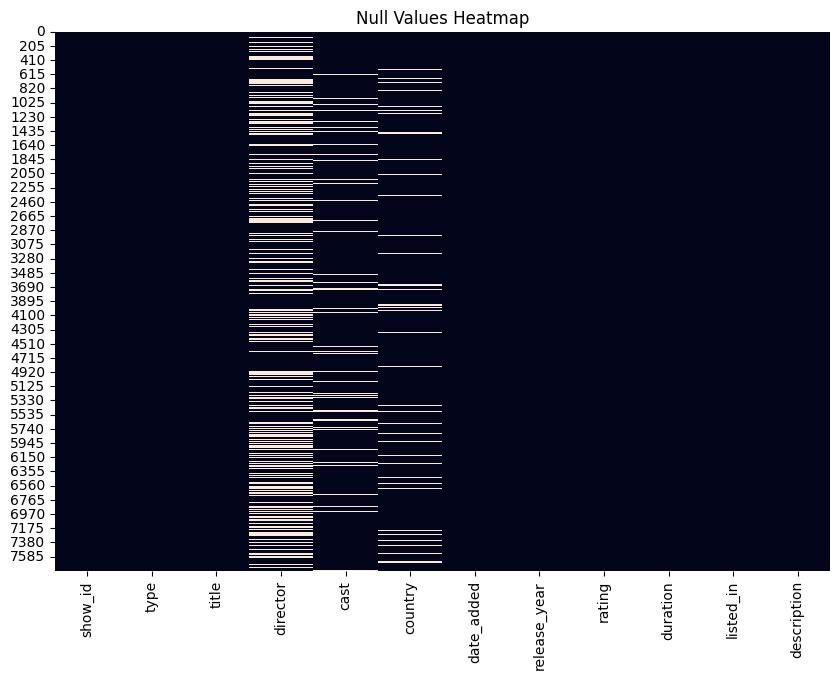

In [ ]:
plt.figure(figsize= (10,7))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Above in the heatmap and table, we can see that there are a few null values in our the dataset. There are a total of 3,036 null values across the entire dataset with 2389 missing points under 'director', 718 under 'cast', 507 under 'country', 10 under 'date_added', and 7 under  the'rating'. We will have to handle all null data points before we can jump into EDA and modeling.

In [ ]:
df['director'].fillna('No Director', inplace=True)
df['cast'].fillna('No Cast', inplace=True)
df['country'].fillna('Country Unavailable', inplace=True)
df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
#check still there is null value or not
df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

# ***Splitting the Dataset***

Since the dataset can either contain movies or shows, it'd be nice to have datasets for both so we can take a deep dive into just Netflix movies or Netflix TV shows so we will create two new datasets. One for movies and the other one for shows.

In [ ]:
movies_df = df[df['type']=='Movie'].copy()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
shows_df = df[df['type']=='TV Show'].copy()
shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


### **Data Preparation**
In the duration column, there appears to be a difference between movies and shows. Movies are based on the duration of the movie and shows are based on the number of seasons. To make EDA easier, I will convert the values in these columns into integers for both the movies and shows datasets.

In [ ]:
movies_df.duration = movies_df.duration.str.replace(' min','').astype(int)
shows_df.rename(columns={'duration':'seasons'}, inplace=True)
shows_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
shows_df.seasons = shows_df.seasons.str.replace(' Seasons','').astype(int)

# ***Exploratory Data Analysis and Visualization***

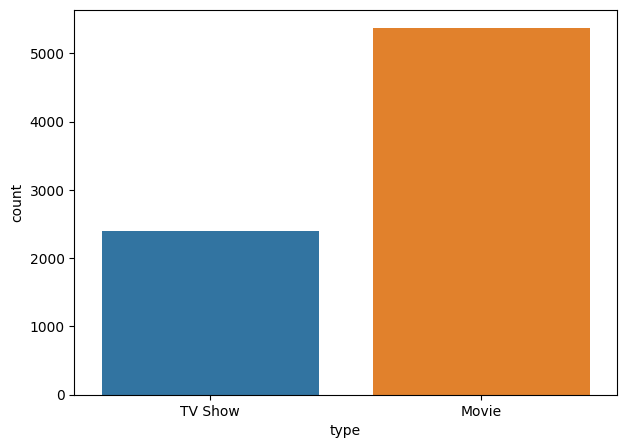

In [ ]:
#Visualize the number of movies and tv shows
plt.figure(figsize=(7,5))
#convert data type into string if it is not
df['type']=df['type'].astype(str)
#handling missing value
df['type'].fillna('Unknown',inplace=True)
#map incorrect values to the correct values
df['type'].replace({'TV Show':'TV Show'},inplace=True)
#Now visualize
sns.countplot(data=df,x='type')
plt.show()

From above plot we can see that movies are more popular than tv shows.

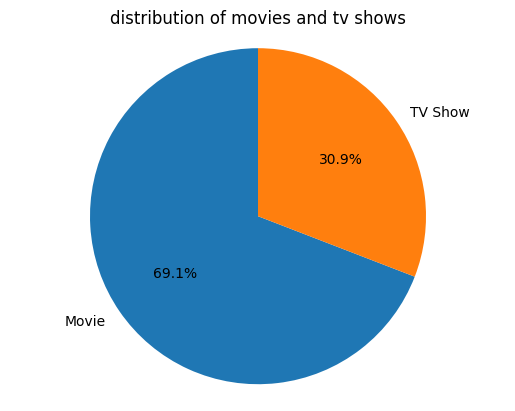

In [ ]:
#Making a pie chart to know the percentage of tv show and movies
type_counts=df['type'].value_counts()
labels=type_counts.index
sizes=type_counts.values

plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('distribution of movies and tv shows')
plt.axis('equal')
plt.show()

In [ ]:
#Now create two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']
tv_shows
movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,No Director,Nasty C,Country Unavailable,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


Which category has highest ratings

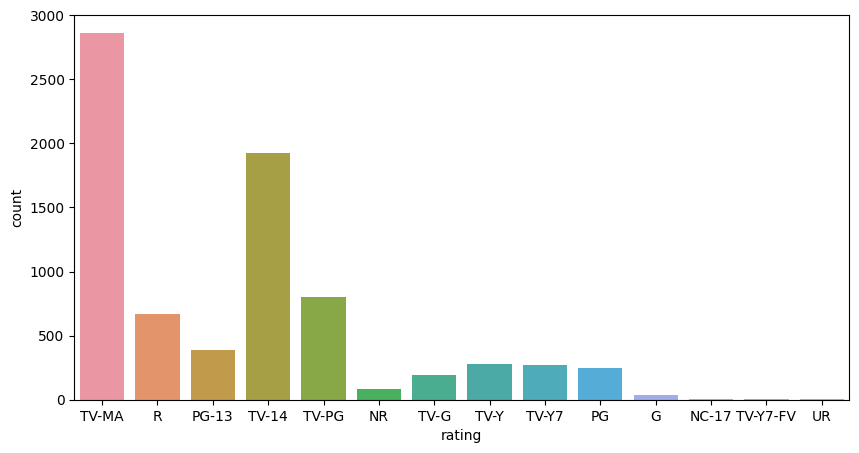

In [ ]:
#lets us check which category has the highest ratings
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(data=df,x='rating')
plt.show()

From above barplot we found that TV_MA is the highest ratings and G is the lowest ratings.

In [ ]:
# In which year the maximum numbers of movies and shows released
df['release_year'].value_counts().sort_index(ascending=False)

2021      31
2020     868
2019     996
2018    1120
2017    1010
        ... 
1945       3
1944       3
1943       3
1942       2
1925       1
Name: release_year, Length: 73, dtype: int64

In [ ]:
# In which year the maximum number of movies released
movies_year=movies['release_year'].value_counts().sort_index(ascending=False)
movies_year

2021     12
2020    411
2019    582
2018    734
2017    742
       ... 
1946      1
1945      3
1944      3
1943      3
1942      2
Name: release_year, Length: 72, dtype: int64

In [ ]:
# In which year the maximum number of Tv Shows released
tvshows_year=tv_shows['release_year'].value_counts().sort_index(ascending=False)
tvshows_year

2021     19
2020    457
2019    414
2018    386
2017    268
2016    239
2015    156
2014     90
2013     63
2012     60
2011     39
2010     36
2009     34
2008     22
2007     13
2006     13
2005     12
2004      9
2003      7
2002      6
2001      4
2000      4
1999      7
1998      4
1997      4
1996      3
1995      2
1994      1
1993      4
1992      2
1991      1
1990      3
1989      1
1988      2
1986      2
1985      1
1981      1
1979      1
1977      1
1974      1
1972      1
1968      1
1967      1
1963      1
1946      1
1925      1
Name: release_year, dtype: int64

Text(0.5, 1.02, 'production growth based on years')

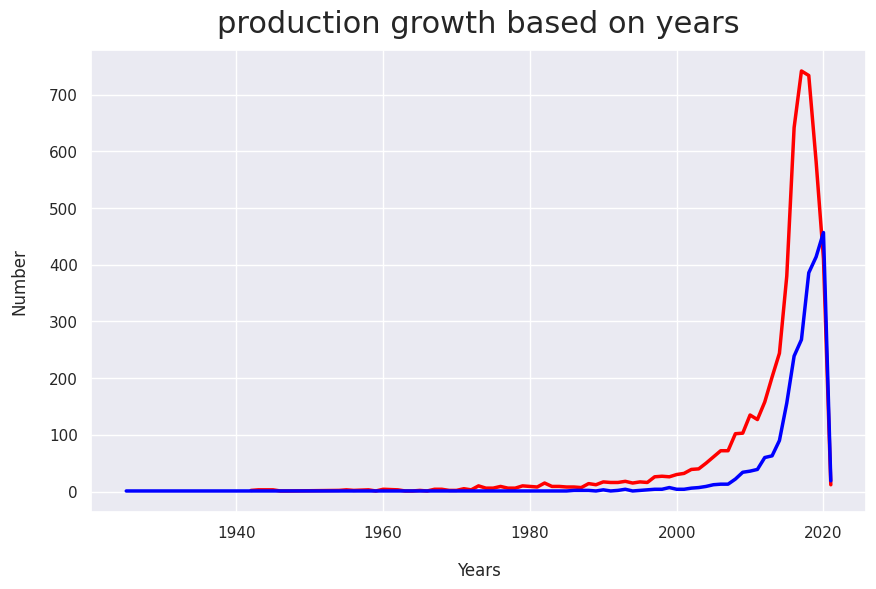

In [ ]:
#Visualization the movies and tv shows based on their released year
sns.set(font_scale=1)
movies_year.plot(figsize=(10,6),linewidth=2.5,color='red',label='Movies/year',ms=3)
tvshows_year.plot(figsize=(10,6),linewidth=2.5,color='blue',label='TV Shows/year')
plt.xlabel('Years',labelpad=15)
plt.ylabel('Number',labelpad=15)
plt.title('production growth based on years',y=1.02,fontsize=22)

Red color shows the growth year of movies and blue color shows the growth year of tv shows.As we can see from the graph that as increasing of years also increasing the graph of movies and tv shows.But the popularity of tv shows is less as compare to movies on netflix.

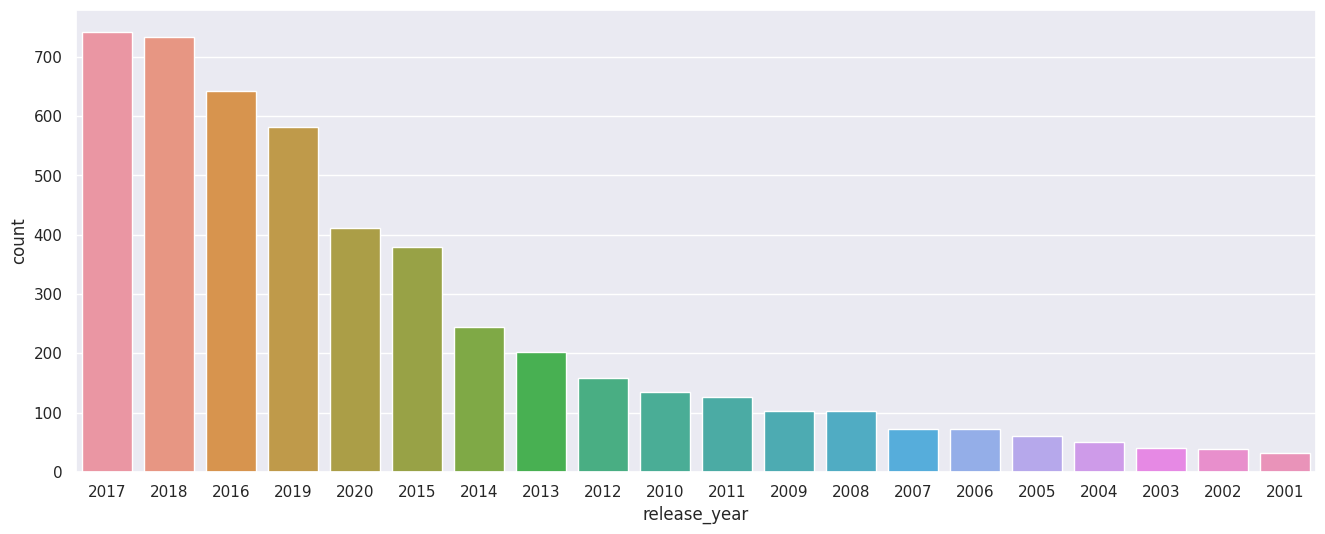

In [ ]:
#Analysing how many movies are released every year in last 20 years
plt.figure(figsize=(16,6))
sns.countplot(x=movies['release_year'],data=df,order=movies['release_year'].value_counts().index[0:20])
plt.show()

From above graph we can see that as year increasing the releasing of movies per year is also increasing.So we can say that maximum number of movies released in year 2017.

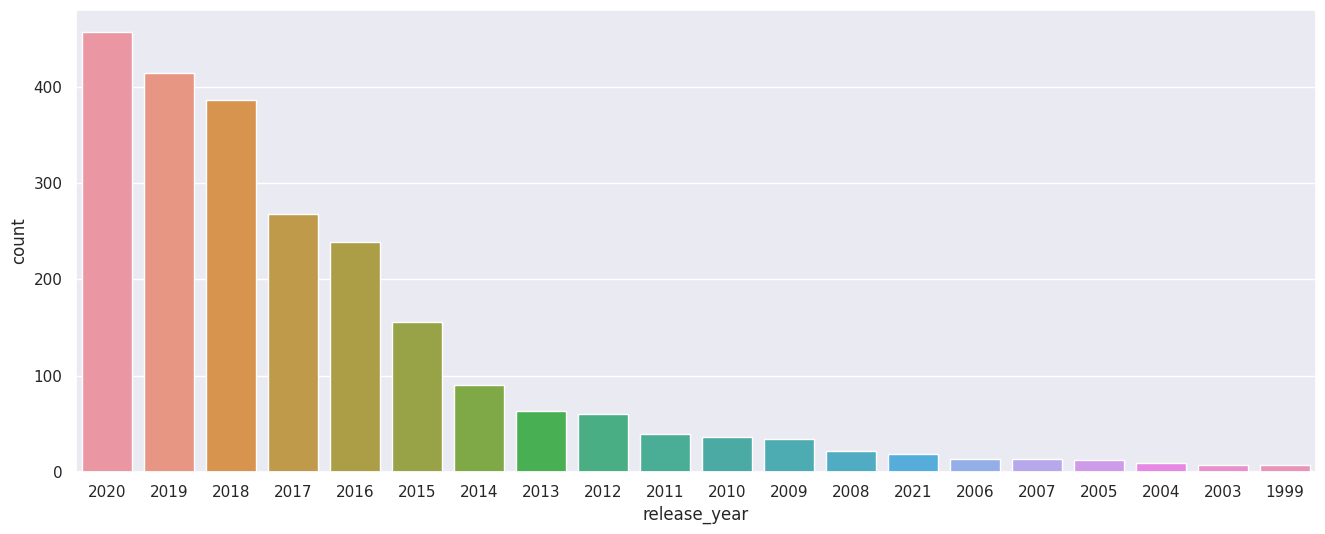

In [ ]:
#Let see how many tv shows are released in past 20 years
plt.figure(figsize=(16,6))
sns.countplot(x=tv_shows['release_year'],data=df,order=tv_shows['release_year'].value_counts().index[0:20])
plt.show()

From this as we can that as like movies growth of tv shows is also increasing of increasing years.So we can see that maximum number of tv show released in year 2020.

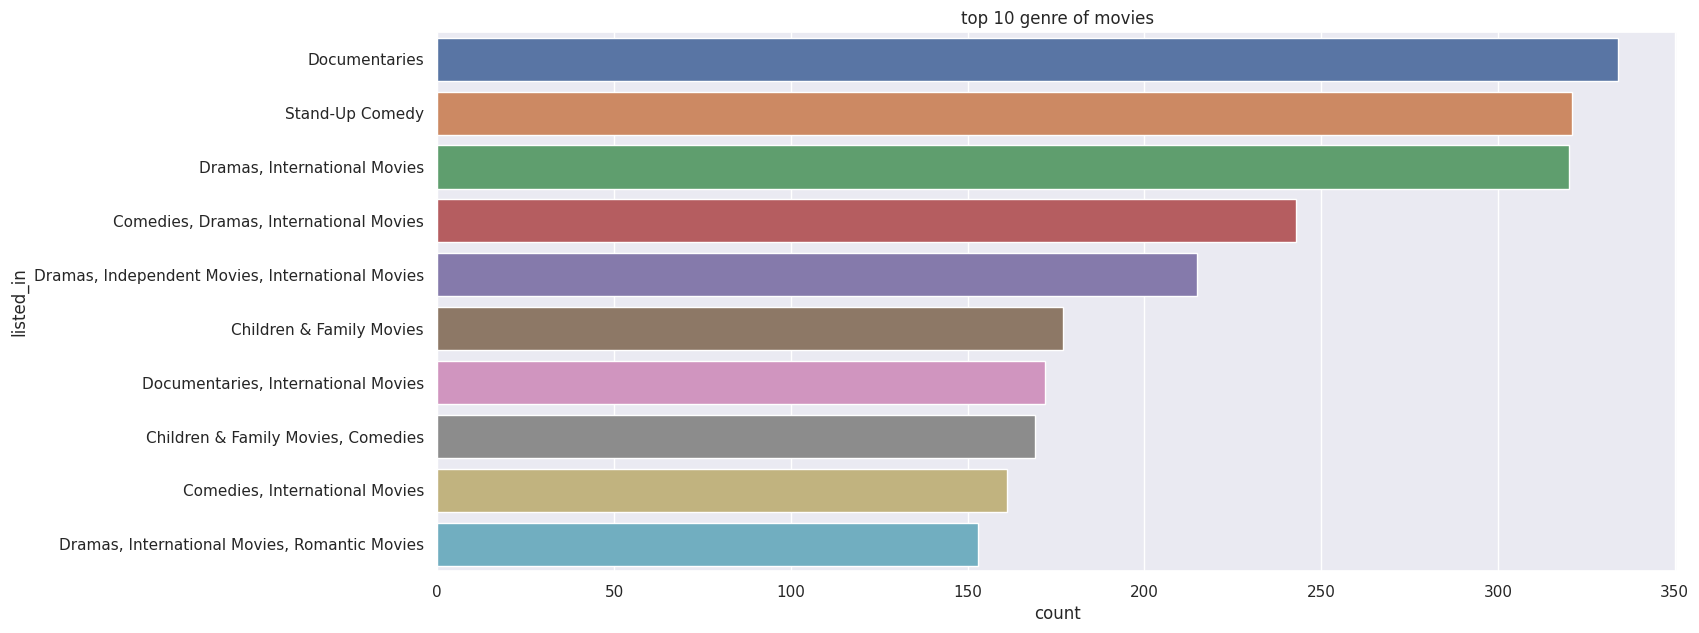

In [ ]:
#Analysing top 10 genre of the movies
plt.figure(figsize=(16,7))
plt.title('top 10 genre of movies')
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10])
plt.show()

From graph we can see that documentry is more popular than the other categories.

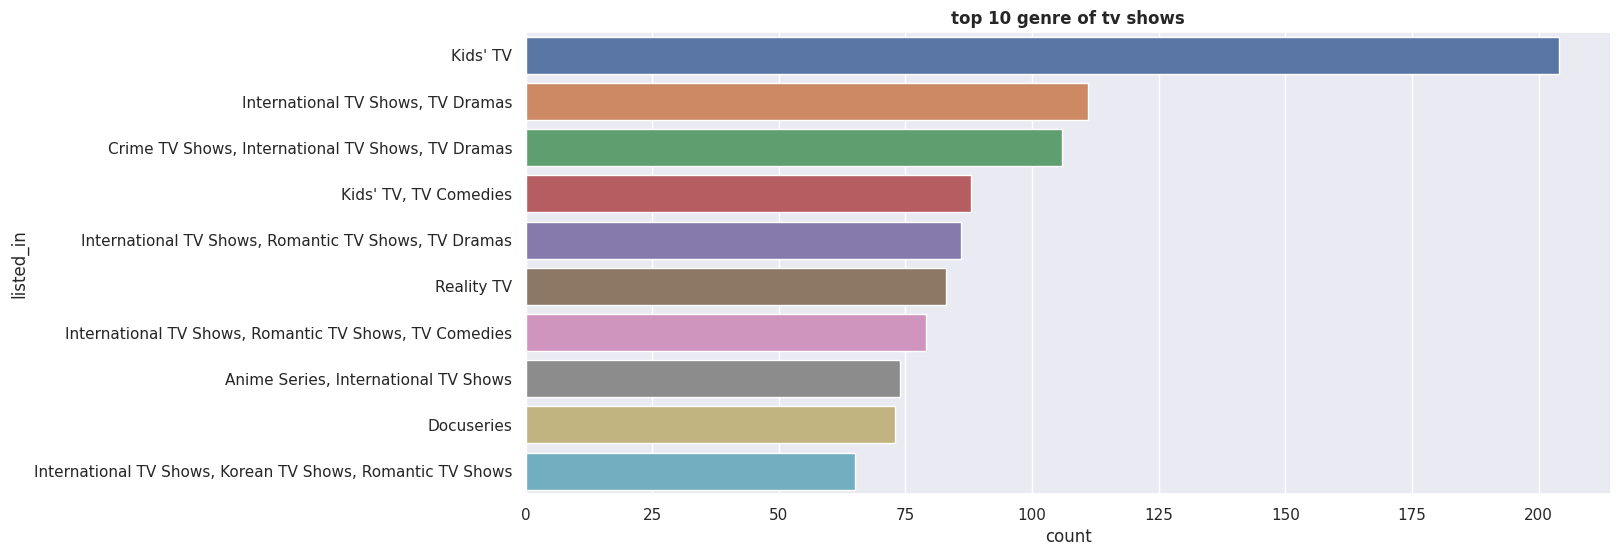

In [ ]:
#Analysing top 10 genre of tv shows
plt.figure(figsize=(14,6))
plt.title('top 10 genre of tv shows',fontweight='bold')
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10])
plt.show()

From this graph we can see that kids TV is more popular in tv shows,accordingly other tv shows.

### **Lets check which season has the maximum duration**

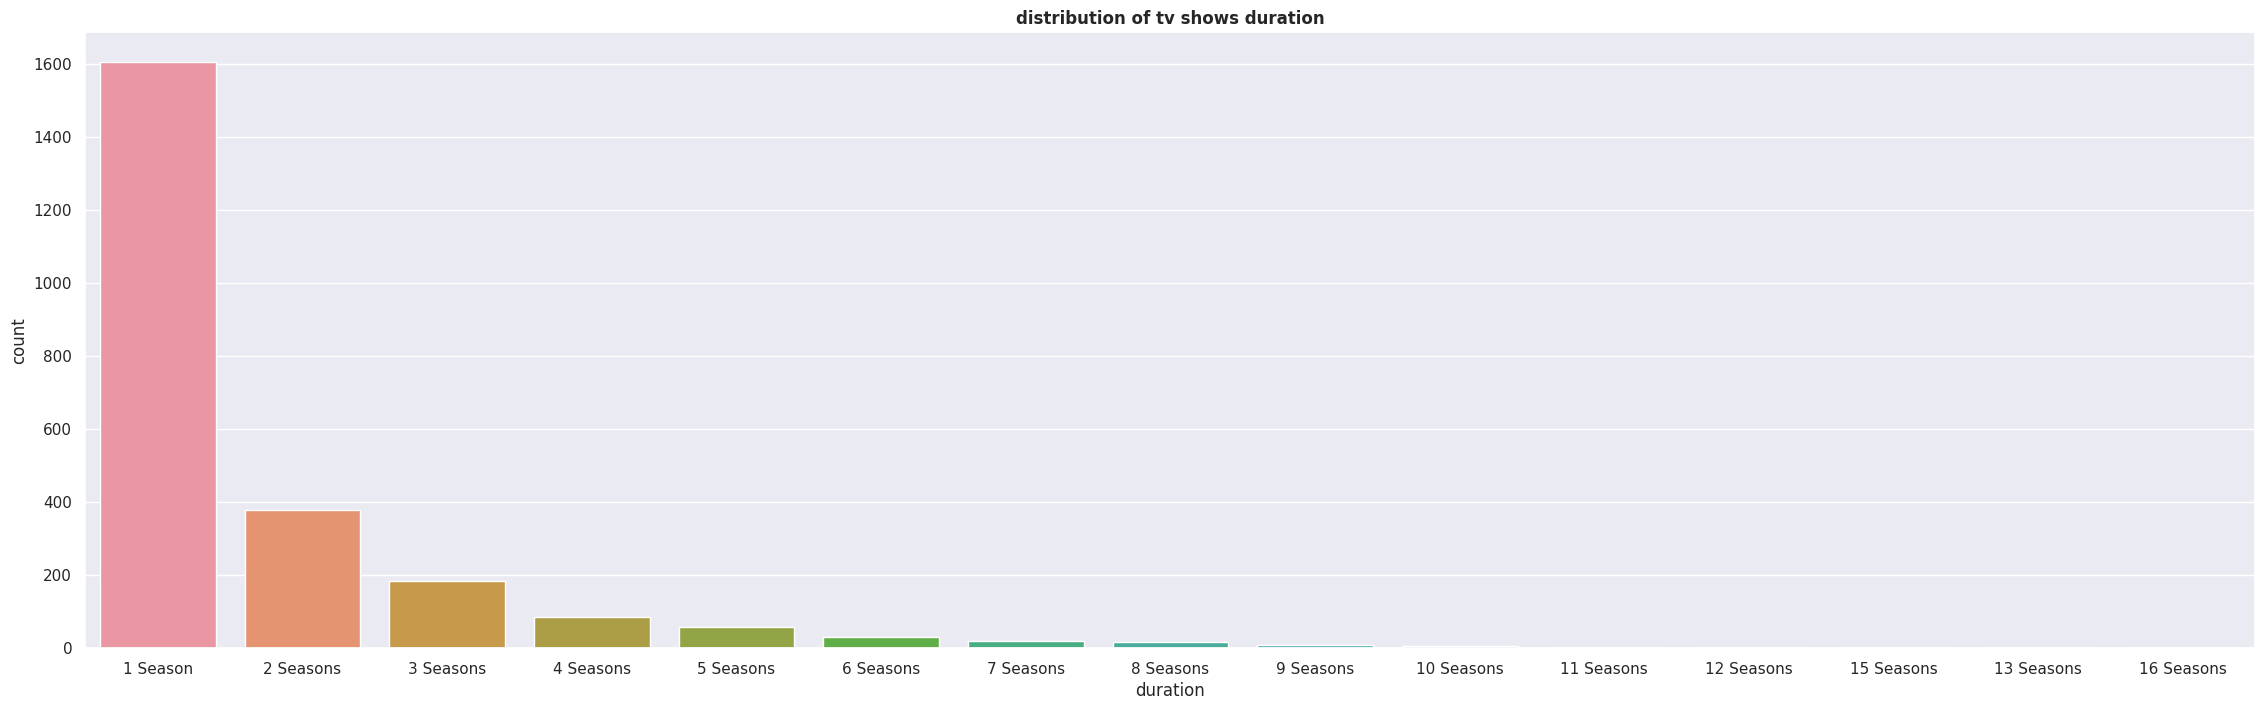

In [ ]:
#lets check distribution of tv shows
plt.figure(figsize=(28,8))
plt.title('distribution of tv shows duration',fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order=tv_shows['duration'].value_counts().index)
plt.show()

So from above graph we see that season 1 is more duration than the other season.

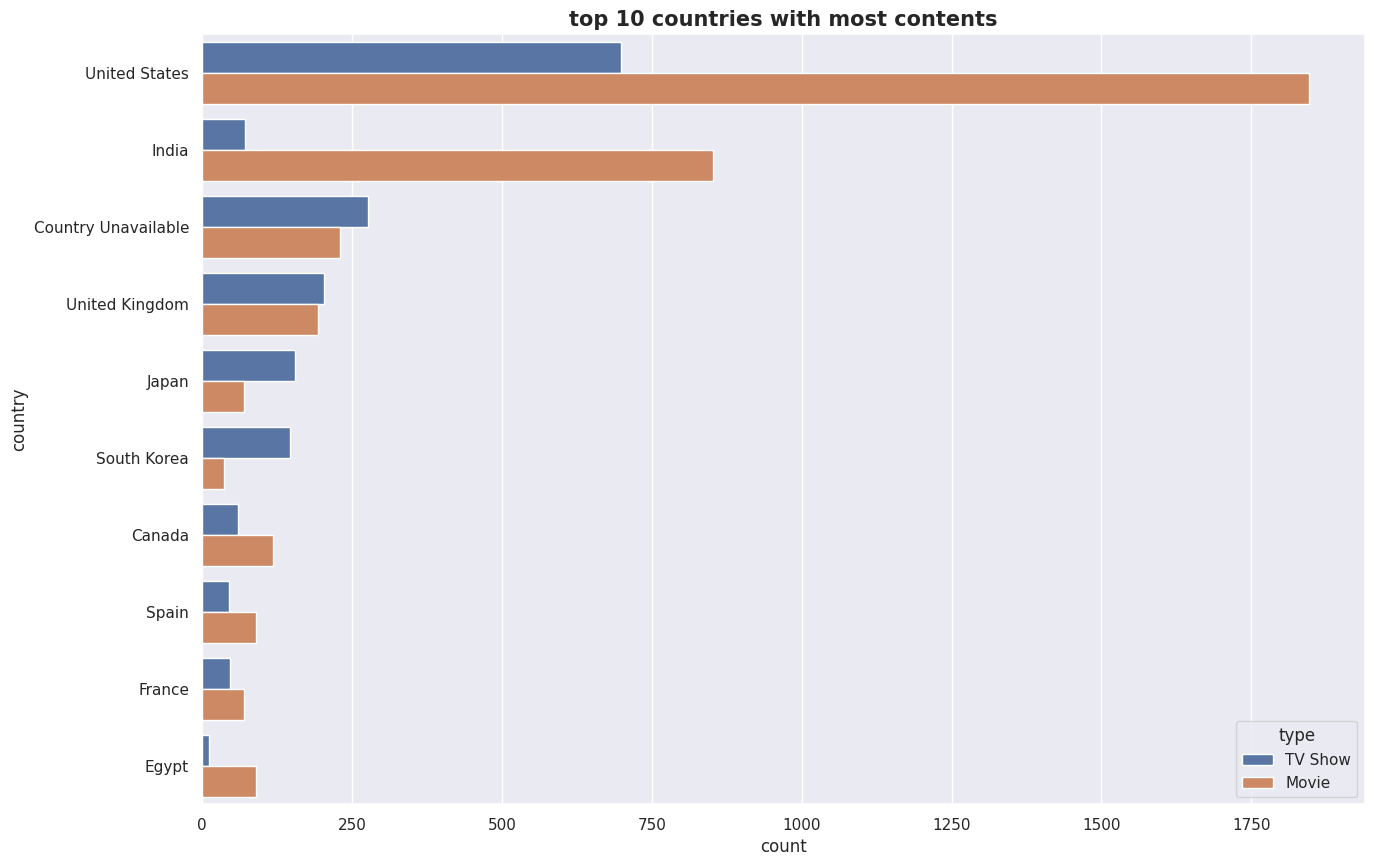

In [ ]:
#Checking top 10 countries with most content
plt.figure(figsize=(15,10))
sns.countplot(y=df['country'],order=df['country'].value_counts().index[0:10],hue=df['type'])
plt.title('top 10 countries with most contents',fontsize=15,fontweight='bold')
plt.show()

From above barplot we can see that America has maximum number of content avaliable on netflix,than India and than UK.

# **Feature Engineering**

Feature engineering refers to the process of selecting, creating, and transforming features (input variables) from your raw data to improve the performance and accuracy of a machine learning model. It involves understanding your data, identifying relevant patterns, and designing these features to help the model make better predictions or classifications.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df['description'].astype(str)

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: description, Length: 7770, dtype: object

In [ ]:
#Making list of description features
df['description']=df['description'].apply(lambda x: x.split(' '))

In [ ]:
#converting text feature to string from list
df['description']=df['description'].apply(lambda x: " ".join(x))
#making all words in text feature to lowercase
df['description']=df['description'].apply(lambda x: x.lower())

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
 #replacing the punctuation with no space
    translator = str.maketrans('','', string.punctuation)
    return text.translate(translator)
 #applying above function on text feature

In [ ]:
df['description']=df['description'].apply(remove_punctuation)

In [ ]:
df['description'][0:10]

0    in a future where the elite inhabit an island ...
1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead his fellow ...
3    in a postapocalyptic world ragdoll robots hide...
4    a brilliant group of students become cardcount...
5    a genetics professor experiments with a treatm...
6    after an awful accident a couple admitted to a...
7    after one of his high school students attacks ...
8    when a doctor goes missing his psychiatrist wi...
9    an architect and his wife move into a castle t...
Name: description, dtype: object

In [ ]:
#To download stopwords using nltk library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Let's check again description column
df['description'][0:10]

0    in a future where the elite inhabit an island ...
1    after a devastating earthquake hits mexico cit...
2    when an army recruit is found dead his fellow ...
3    in a postapocalyptic world ragdoll robots hide...
4    a brilliant group of students become cardcount...
5    a genetics professor experiments with a treatm...
6    after an awful accident a couple admitted to a...
7    after one of his high school students attacks ...
8    when a doctor goes missing his psychiatrist wi...
9    an architect and his wife move into a castle t...
Name: description, dtype: object

In [ ]:
#Defining stopwords
def stopwords(text):
  '''a function for removing the stopword'''
  text=[word for word in text.split() if word not in sw]
  #joining the list of words with space
  return " ".join(text)

In [ ]:
#Apllying above function on  text feature
df['description']=df['description'].apply(stopwords)
df['description'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

In [ ]:
#Apllying above function on  text feature
df['description']=df['description'].apply(stopwords)
df['description'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

In [ ]:
df.head()['country']

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: country, dtype: object

**Now converting text in to vector.**

In [ ]:
#Importing Tfidf vectorizer to convert text in to vector
from sklearn.feature_extraction.text import TfidfVectorizer

#applying Tfidf vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf=tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

(7770, 5000)

In [ ]:
#convert X in to array to form clustering
X=X_tfidf.toarray()

**Train Test Split**

### **K-Mean**

K-Means does groups similar data points into clusters based on their features. It helps find patterns in data by making sure similar things are grouped together.

Finding the optimal number of clusters using elbow method

In [ ]:
from sklearn.cluster import KMeans
wcss_list=[] #initializing the list for the values of wcss("Within-Cluster Sum of Squares.")

#Using for loop for iterations from 1 to 30
for k in range(1,30):
  kmeans= KMeans(n_clusters=k,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss_list.append(kmeans.inertia_)

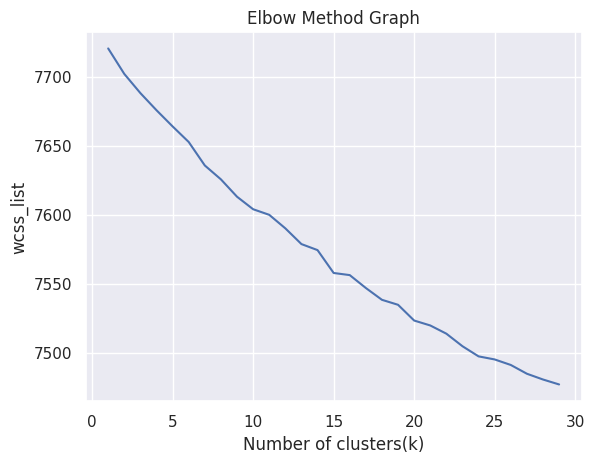

In [ ]:
#plotting elbow method graph
plt.plot(range(1,30),wcss_list)
plt.title('Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [ ]:
#knee locator
!pip install kneed

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1,30),wcss_list,curve='convex',direction='decreasing')
kl.elbow

23

In [ ]:
#silhoutte score of clusters
from sklearn.metrics import silhouette_score
sill=[]
for k in range(2,30):
  model= KMeans(n_clusters=k,init='k-means++',random_state=42)
  model.fit(X)
  y1= model.predict(X)
  score=silhouette_score(X,y1)
  sill.append(score)
  print('cluster: %d \t sillhoute: %0.4f'%(k,score))

cluster: 2 	 sillhoute: 0.0014
cluster: 3 	 sillhoute: 0.0018
cluster: 4 	 sillhoute: 0.0020
cluster: 5 	 sillhoute: 0.0024
cluster: 6 	 sillhoute: 0.0029
cluster: 7 	 sillhoute: 0.0035
cluster: 8 	 sillhoute: 0.0038
cluster: 9 	 sillhoute: 0.0044
cluster: 10 	 sillhoute: 0.0046
cluster: 11 	 sillhoute: 0.0050
cluster: 12 	 sillhoute: 0.0049
cluster: 13 	 sillhoute: 0.0053
cluster: 14 	 sillhoute: 0.0055
cluster: 15 	 sillhoute: 0.0059
cluster: 16 	 sillhoute: 0.0060
cluster: 17 	 sillhoute: 0.0060
cluster: 18 	 sillhoute: 0.0064
cluster: 19 	 sillhoute: 0.0063
cluster: 20 	 sillhoute: 0.0067
cluster: 21 	 sillhoute: 0.0066
cluster: 22 	 sillhoute: 0.0069
cluster: 23 	 sillhoute: 0.0071
cluster: 24 	 sillhoute: 0.0069
cluster: 25 	 sillhoute: 0.0069
cluster: 26 	 sillhoute: 0.0072
cluster: 27 	 sillhoute: 0.0076
cluster: 28 	 sillhoute: 0.0072
cluster: 29 	 sillhoute: 0.0073


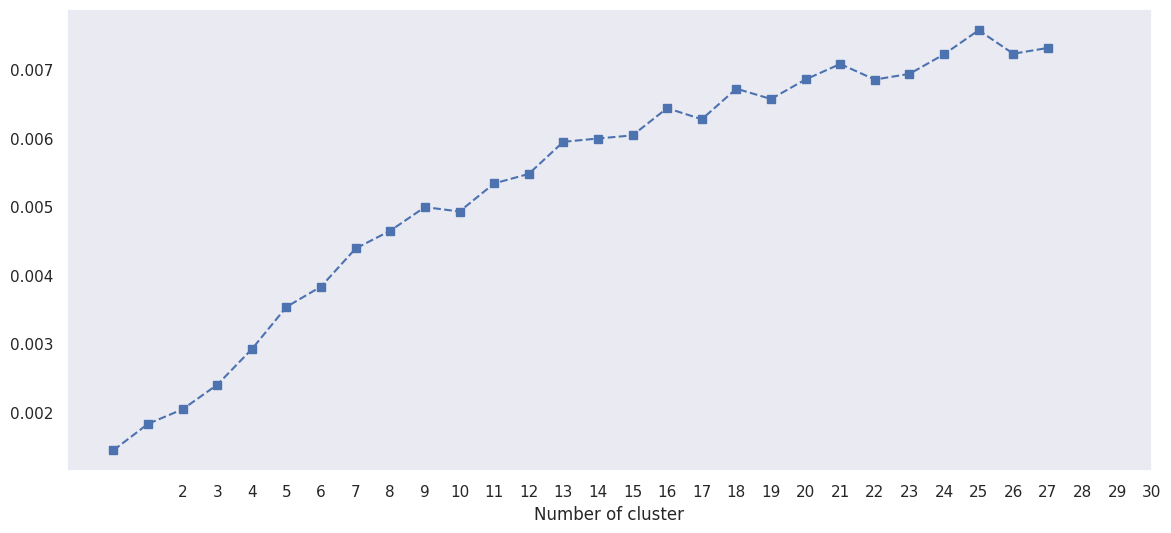

In [ ]:
#Plotting sillhoute score
plt.figure(figsize=(14,6))
plt.plot(sill,'bs--')
plt.xticks(list(range(2,31)),list(range(2,31)))
plt.grid()
plt.xlabel('Number of cluster')
plt.show()

Based on the elbow method and silhoutte score we found that 26 clusters will be formed for the given dataset.

In [ ]:
#training the k-means model
kmeans=KMeans(n_clusters=26,init='k-means++',random_state=42)
y_predict=kmeans.fit_predict(X)

# **Model Evaluation**

In [ ]:
#predict the clusters and evaluate the sillhoute score
score=silhouette_score(X,y_predict)
print('silhouette score is {}'.format(score))

silhouette score is 0.007218341785521539


In [ ]:
#davies bouldin score for clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X,y_predict)

9.193799997853855

In [ ]:
#adding a seperate column for clusters
df["cluster"]=y_predict

In [ ]:
df['cluster'].value_counts().sort_index()

0      155
1      271
2      532
3     2504
4      158
5      319
6       72
7      268
8      205
9      138
10     224
11     331
12     232
13      79
14     284
15     189
16     209
17     223
18     289
19     192
20     108
21     175
22     140
23     234
24     150
25      89
Name: cluster, dtype: int64

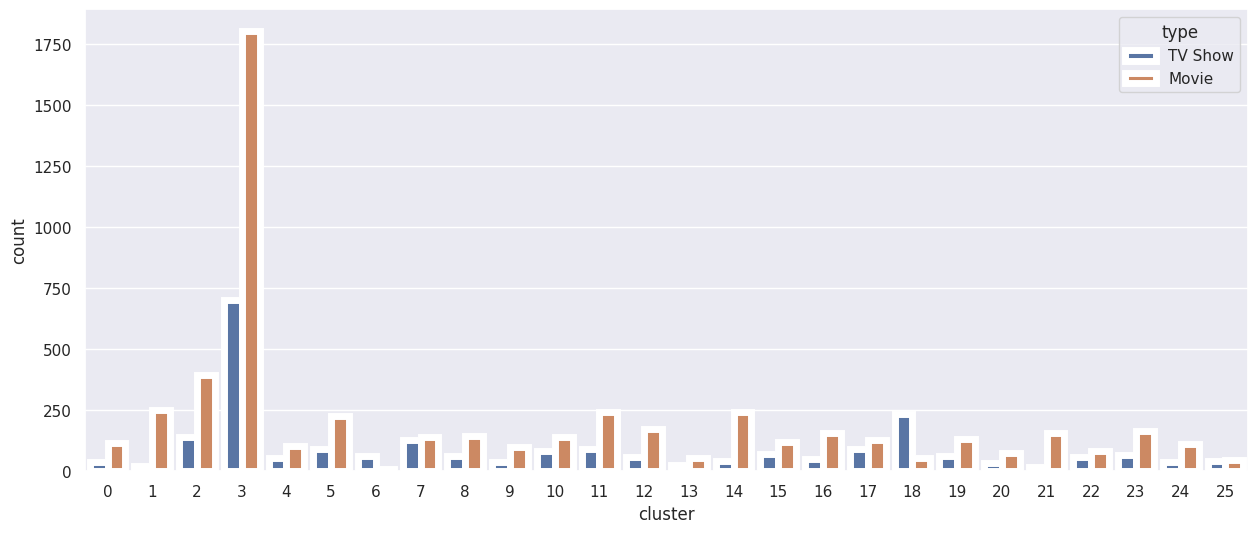

In [ ]:
#plotting graph
fig,ax=plt.subplots(figsize=(15,6))
sns.countplot(x='cluster',hue='type',lw=5,data=df,ax=ax)
plt.show()

from above barplot we can see that third cluster contains the higher number of data points as compared to other clusters.

In [ ]:
#scatter plot for clusters
fig=px.scatter(df,y='description',x='cluster',color='cluster')
fig.update_traces(marker_size=100)
fig.show()

# **Agglomerative clustering algorithm**

Agglomerative clustering is like building a family tree in reverse. You start with individual people and gradually group them together based on their similarities. It's a bottom-up approach where you combine the closest individuals or groups step by step until everyone is in one big family. In data, Agglomerative clustering groups data points based on their distances, creating clusters that are more similar to each other as you move up the hierarchy. It's a bit like putting similar puzzle pieces together to form bigger pieces until you have a complete picture.

In [ ]:
#Agglomerative clusters
from sklearn.cluster import AgglomerativeClustering

aggh=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
aggh.fit(X)
y_hc=aggh.fit_predict(X)

In [ ]:
df_hierarchical=df.copy()
#creating a column where each row is assigned to their seperate cluster
df_hierarchical['cluster']=aggh.labels_
df_hierarchical.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cluster
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliant group students become cardcounting e...,0


# **Model evaluation**

In [ ]:
#Sillihouette coefficient
print('sillihouette coefficient: %0.3f'%silhouette_score(X,y_hc,metric='euclidean'))

sillihouette coefficient: -0.002


In [ ]:
#davies bouldin score
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X,y_hc)

13.979382092977453

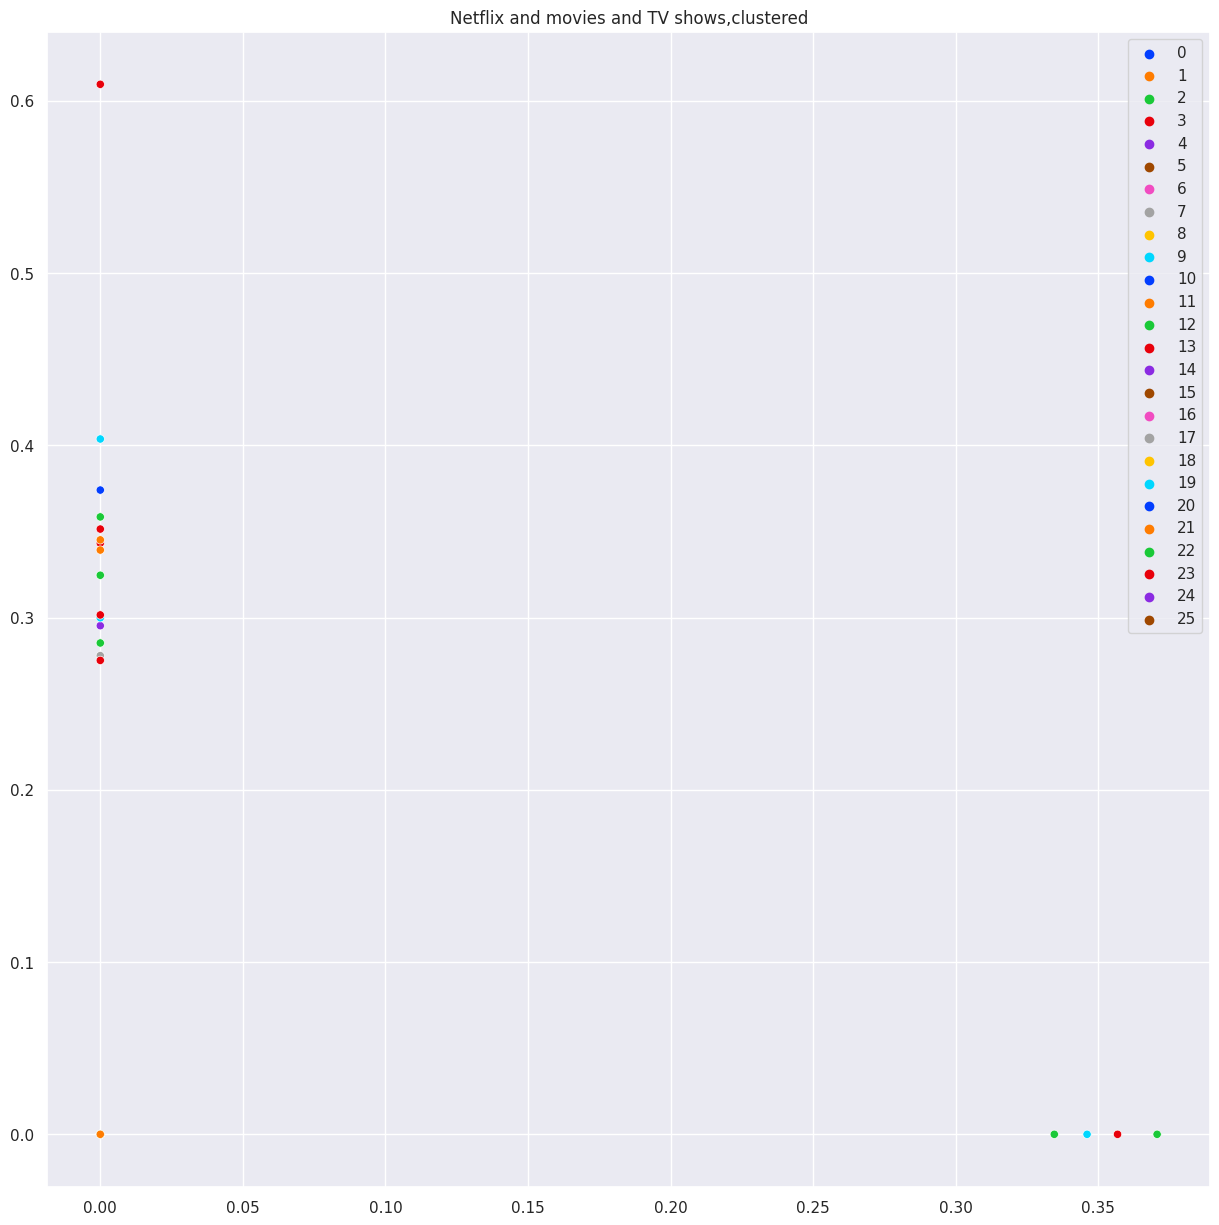

In [ ]:
#Scatterplot for cluster
sns.set(rc={'figure.figsize':(15,15)})
palette=sns.color_palette('bright',len(set(y_predict)))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y_predict,palette=palette)
plt.title('Netflix and movies and TV shows,clustered')
plt.show()

# **Conclusion**

Through the application of clustering techniques on the Netflix movies and TV shows dataset, we have gained valuable insights into the content landscape of the platform. By grouping similar content items based on shared attributes, we were able to uncover underlying patterns and trends that offer meaningful implications.

After using two algorithms that is k-means and agglomerative clustering algorithm we found that the evaluation of Elbow and Silhouette scores,the optimal number of clusters is determined to be 26.K Means found to be more suitable for identification than the agglomerative clustering.

TV-MA shows the highest number of ratings among tv shows.It represent the adult content.

Documentries emerge as the most popular genre on netflix,than stand up comedy than dramas.

Kids tv shows is the top genre among all the tv shows on netflix.